### Importation - Inspection

In [1]:
import os
import pandas as pd
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

In [2]:
logements_neufs = pd.read_csv(os.path.join('../data','raw','neufs.csv'))
logements_existants = pd.read_csv(os.path.join('../data','raw','existents.csv'))

C:\Users\Evidya\AppData\Local\Temp\ipykernel_6888\4050655527.py:1: DtypeWarning: Columns (80,100,111,112,132,133) have mixed types. Specify dtype option on import or set low_memory=False.
  logements_neufs = pd.read_csv(os.path.join('../data','raw','neufs.csv'))
C:\Users\Evidya\AppData\Local\Temp\ipykernel_6888\4050655527.py:2: DtypeWarning: Columns (159,191,202,208,214,215,218,219,220,221,228,232) have mixed types. Specify dtype option on import or set low_memory=False.
  logements_existants = pd.read_csv(os.path.join('../data','raw','existents.csv'))


In [3]:
# Afficher les dimensions des deux datasets
print("Dimensions du dataset logements_neufs :", logements_neufs.shape)
print("Dimensions du dataset logements_existants :", logements_existants.shape)

Dimensions du dataset logements_neufs : (59213, 135)
Dimensions du dataset logements_existants : (398114, 235)


In [4]:
# Ajouter la colonne 'Logement' avec la valeur 'neuf' dans le dataset logements_neufs
logements_neufs['Logement'] = 'neuf'

# Ajouter la colonne 'Logement' avec la valeur 'ancien' dans le dataset logements_existants
logements_existants['Logement'] = 'ancien'

In [5]:
# Convertion de la colonne "Date_réception_DPE" au format datetime
logements_neufs["Date_réception_DPE"] = pd.to_datetime(logements_neufs["Date_réception_DPE"], errors='coerce')

logements_neufs["Année_construction"] = logements_neufs["Date_réception_DPE"].apply(lambda x : x.year)

In [6]:
import numpy as np

distribution = logements_existants['Année_construction'].value_counts(normalize=True)

# Remplacer les valeurs manquantes en tirant aléatoirement basé sur la distribution
logements_existants['Année_construction'] = logements_existants['Année_construction'].apply(
    lambda x: np.random.choice(distribution.index, p=distribution.values) if pd.isnull(x) else x
)

In [7]:
# Étape 1 : Lister les colonnes des deux DataFrames
colonnes_communes = logements_neufs.columns.intersection(logements_existants.columns)

# Étape 3 : Sélectionner uniquement les colonnes communes
logements_neufs_communs = logements_neufs[colonnes_communes]
logements_existants_communs = logements_existants[colonnes_communes]

# Étape 4 : Concaténer les DataFrames sur les colonnes communes
df = pd.concat([logements_neufs_communs, logements_existants_communs], ignore_index=True)

# Afficher les dimensions du DataFrame fusionné pour vérifier
df.head()

,Conso_chauffage_dépensier_é_finale,Emission_GES_ECS,Type_énergie_n°1,Nom__commune_(BAN),Emission_GES_chauffage,Date_réception_DPE,Coût_ECS_énergie_n°1,Conso_ECS_é_finale,Coût_total_5_usages,Emission_GES_5_usages,...,Déperditions_portes,Deperditions_baies_vitrées,Déperditions_ponts_thermiques,Besoin_chauffage,Deperditions_enveloppe,Cage_d'escalier,Classe_inertie_bâtiment,Surface_tertiaire_immeuble,Logement,Année_construction
0,2146.0,37.4,Électricité,Saint-Brieuc,146.2,2022-04-01 00:00:00,113.8,575.0,523.4,198.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neuf,2022.0
1,1352.8,45.1,Électricité,Saint-Brieuc,92.1,2022-06-19 00:00:00,144.0,693.4,461.6,161.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neuf,2022.0
2,1361.5,51.0,Électricité,Saint-Brieuc,92.7,2022-06-07 00:00:00,164.9,785.3,451.3,156.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neuf,2022.0
3,2395.9,37.2,Électricité,Saint-Brieuc,163.2,2022-04-27 00:00:00,110.8,571.6,561.0,217.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neuf,2022.0
4,2146.0,37.4,Électricité,Saint-Brieuc,146.2,2022-04-01 00:00:00,113.8,575.0,523.4,198.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neuf,2022.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457327 entries, 0 to 457326
Columns: 133 entries, Conso_chauffage_dépensier_é_finale to Année_construction
dtypes: float64(75), int64(4), object(54)
memory usage: 464.1+ MB


In [9]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentages = df.isnull().mean()
colonnes_a_fort_taux_manquant = missing_percentages[missing_percentages > 0.4].index.tolist()
missing_percentages

Conso_chauffage_dépensier_é_finale    0.000052
Emission_GES_ECS                      0.000004
Type_énergie_n°1                      0.000000
Nom__commune_(BAN)                    0.000000
Emission_GES_chauffage                0.000052
                                        ...   
Cage_d'escalier                       0.998957
Classe_inertie_bâtiment               0.146066
Surface_tertiaire_immeuble            0.998082
Logement                              0.000000
Année_construction                    0.000000
Length: 133, dtype: float64

In [10]:
# Proportion des variables ayant au moins 60% de valeurs manquantes
(missing_percentages > 0.60).value_counts()

False    116
True      17
Name: count, dtype: int64

In [11]:
# Supprimer les colonnes ayant plus de 20% de valeurs manquantes
df = df.loc[:, missing_percentages < 0.6]
# df = df[df.columns[(missing_percentages < 0.6)]] # Ligne de code alternative pour faire la même chose que celle ci-dessus
df.shape

(457327, 116)

In [12]:
def missing_percentages(data, threshold=0.0):
    valeurs_manquantes = data.isnull().mean()

    # Filtrer pour n'afficher que les colonnes ayant des valeurs manquantes
    colonnes_avec_valeurs_manquantes = valeurs_manquantes[valeurs_manquantes > threshold]
    return colonnes_avec_valeurs_manquantes.sort_values()



In [13]:
missing_percentages(df, 0.1)

Déperditions_renouvellement_air    0.134145
Deperditions_enveloppe             0.134145
Déperditions_murs                  0.134145
Besoin_ECS                         0.134147
Deperditions_baies_vitrées         0.134147
                                     ...   
Nombre_appartement                 0.463727
Type_installation_chauffage        0.469310
Type_installation_ECS_(général)    0.469310
Complément_d'adresse_bâtiment      0.491322
Complément_d'adresse_logement      0.510029
Length: 29, dtype: float64

In [14]:
df = df.drop(columns=["_score", "_id", "Adresse_(BAN)", 'Nom__rue_(BAN)', 'Nombre_niveau_logement', 'N°_département_(BAN)',
 'N°_région_(BAN)', 'Identifiant__BAN', '_rand', '_i', 'N°_voie_(BAN)', 'Nombre_appartement', "Nombre_appartement", "Complément_d'adresse_bâtiment", "Complément_d'adresse_logement", "N°DPE"])
df.shape



(457327, 101)

In [15]:
quantitative_data = df.select_dtypes(exclude=['object'])
qualitative_data = df.select_dtypes(include=['object'])

### Evaluation des proportion des valeurs manquantes numériques

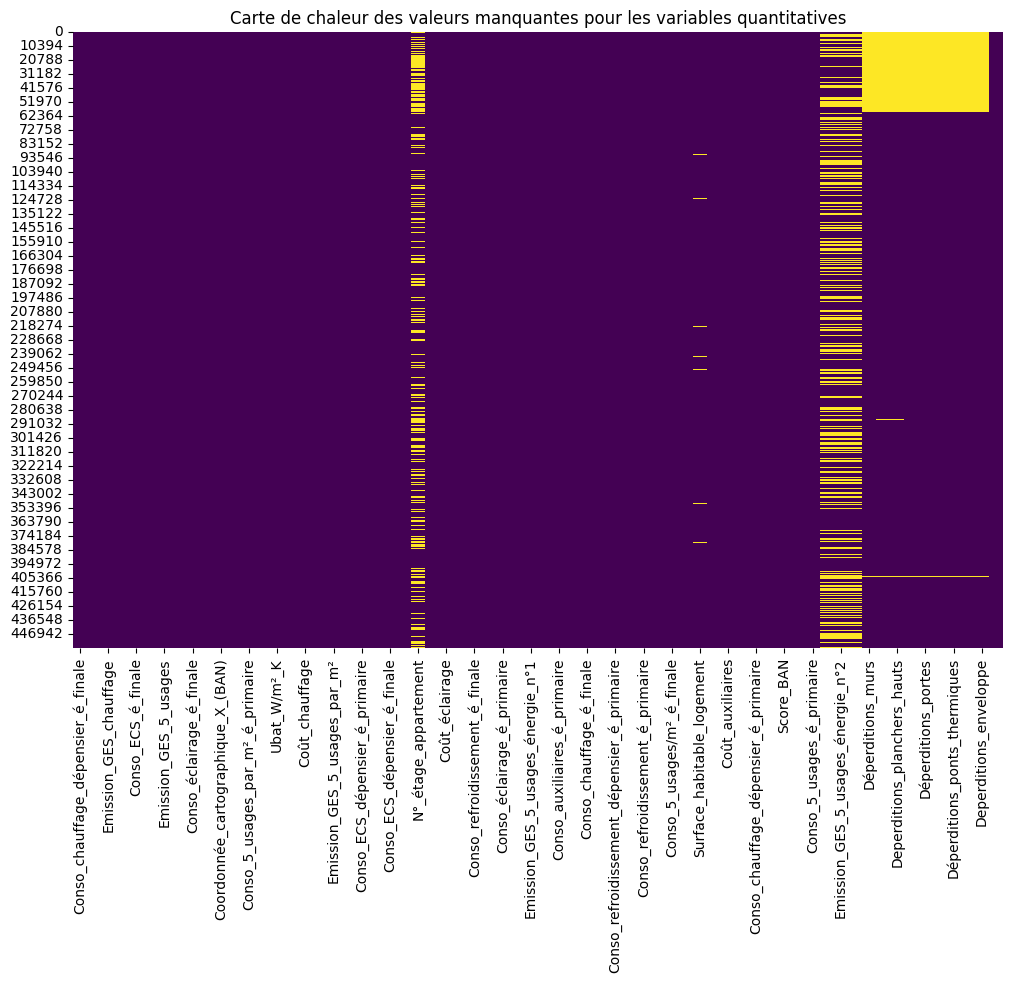

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 8))
sns.heatmap(quantitative_data.isnull(), cbar=False, cmap="viridis")
plt.title("Carte de chaleur des valeurs manquantes pour les variables quantitatives")
plt.show()


In [17]:
quantitative_data[['N°_étage_appartement', "Emission_GES_5_usages_énergie_n°2"]].describe()

,N°_étage_appartement,Emission_GES_5_usages_énergie_n°2
count,313088.000000,281850.000000
mean,0.067515,294.023054
std,0.465754,1295.227799
min,-4.000000,0.000000
25%,0.000000,17.300000
50%,0.000000,44.700000
75%,0.000000,151.300000
max,22.000000,136749.200000


In [18]:
quantitative_data.fillna(quantitative_data.median(), inplace=True)

### Evaluation des données manquantes qualitatives

In [19]:
qualitative_data.describe()

,Type_énergie_n°1,Nom__commune_(BAN),Date_réception_DPE,Date_fin_validité_DPE,Type_bâtiment,_geopoint,Zone_climatique_,Date_visite_diagnostiqueur,Type_énergie_principale_chauffage,Date_établissement_DPE,...,Logement_traversant_(0/1),Isolation_toiture_(0/1),Indicateur_confort_été,Inertie_lourde_(0/1),Type_installation_ECS_(général),Type_installation_chauffage,Besoin_refroidissement,Besoin_ECS,Classe_inertie_bâtiment,Logement
count,457327,457327,457327,457327,457327,457327,420433,457327,429436,457327,...,296244,295654,296244,289187,242699,242699,395418,395978,390527,457327
unique,13,1593,2232,1172,3,222682,8,1178,13,1173,...,2,2,3,2,3,3,2932,16830,4,2
top,Électricité,Rennes,2022-08-31,2034-03-31,appartement,"48.53455700572217,-1.7986340166416317",H2a,2024-03-27,Électricité,2024-04-01,...,True,True,insuffisant,False,individuel,individuel,0,1201,Légère,ancien
freq,216554,53986,1893,1848,236860,1008,416942,1955,202999,1848,...,214082,190825,136325,222597,203941,169594,391993,1747,131703,398114


In [20]:
missing_percentages(qualitative_data, 0)

Adresse_brute                          0.000020
Qualité_isolation_murs                 0.000197
Qualité_isolation_plancher_bas         0.032259
Type_énergie_principale_chauffage      0.060987
Zone_climatique_                       0.080673
Classe_altitude                        0.080673
Besoin_ECS                             0.134147
Besoin_refroidissement                 0.135371
Classe_inertie_bâtiment                0.146066
Protection_solaire_exterieure_(0/1)    0.352227
Indicateur_confort_été                 0.352227
Présence_brasseur_air_(0/1)            0.352227
Logement_traversant_(0/1)              0.352227
Isolation_toiture_(0/1)                0.353517
Inertie_lourde_(0/1)                   0.367658
Type_énergie_n°2                       0.383701
Type_installation_chauffage            0.469310
Type_installation_ECS_(général)        0.469310
dtype: float64

In [21]:
# Remplacer les valeurs manquantes par une catégorie "Inconnu" pour certaines variables
qualitative_data['Type_énergie_n°2'].fillna('Inconnu', inplace=True)
qualitative_data['Type_installation_chauffage'].fillna('Inconnu', inplace=True)
qualitative_data['Type_installation_ECS_(général)'].fillna('Inconnu', inplace=True)


C:\Users\Evidya\AppData\Local\Temp\ipykernel_6888\169784855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  qualitative_data['Type_énergie_n°2'].fillna('Inconnu', inplace=True)
C:\Users\Evidya\AppData\Local\Temp\ipykernel_6888\169784855.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [22]:
colonnes_binaires = ['Protection_solaire_exterieure_(0/1)', 'Indicateur_confort_été', 
            'Présence_brasseur_air_(0/1)', 'Logement_traversant_(0/1)', 
            'Isolation_toiture_(0/1)', 'Inertie_lourde_(0/1)']
for col in colonnes_binaires:
    print(qualitative_data[col].value_counts())

Protection_solaire_exterieure_(0/1)
False    153154
True     143090
Name: count, dtype: int64
Indicateur_confort_été
insuffisant    136325
moyen          112876
bon             47043
Name: count, dtype: int64
Présence_brasseur_air_(0/1)
False    279910
True      16334
Name: count, dtype: int64
Logement_traversant_(0/1)
True     214082
False     82162
Name: count, dtype: int64
Isolation_toiture_(0/1)
True     190825
False    104829
Name: count, dtype: int64
Inertie_lourde_(0/1)
False    222597
True      66590
Name: count, dtype: int64


In [23]:
for col in colonnes_binaires:
    qualitative_data[col].fillna(qualitative_data[col].mode()[0], inplace=True)

C:\Users\Evidya\AppData\Local\Temp\ipykernel_6888\3522592556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  qualitative_data[col].fillna(qualitative_data[col].mode()[0], inplace=True)
C:\Users\Evidya\AppData\Local\Temp\ipykernel_6888\3522592556.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  qualitativ

In [24]:
missing_percentages(qualitative_data, 0)

Adresse_brute                        0.000020
Qualité_isolation_murs               0.000197
Qualité_isolation_plancher_bas       0.032259
Type_énergie_principale_chauffage    0.060987
Zone_climatique_                     0.080673
Classe_altitude                      0.080673
Besoin_ECS                           0.134147
Besoin_refroidissement               0.135371
Classe_inertie_bâtiment              0.146066
dtype: float64

In [25]:
autres_colonnes = ["Classe_inertie_bâtiment", "Classe_altitude", "Zone_climatique_", "Type_énergie_principale_chauffage", "Qualité_isolation_plancher_bas", "Qualité_isolation_murs"]

for col in autres_colonnes:
    print(qualitative_data[col].value_counts())

Classe_inertie_bâtiment
Légère         131703
Moyenne        130072
Lourde         100124
Très lourde     28628
Name: count, dtype: int64
Classe_altitude
inférieur à 400m    420007
400-800m               340
supérieur à 800m        86
Name: count, dtype: int64
Zone_climatique_
H2a    416942
H1a      1025
H1b       785
H3        705
H1c       373
H2c       293
H2b       255
H2d        55
Name: count, dtype: int64
Type_énergie_principale_chauffage
Électricité                                                     202999
Gaz naturel                                                     149455
Fioul domestique                                                 30751
Réseau de Chauffage urbain                                       24197
Bois – Bûches                                                    12287
Bois – Granulés (pellets) ou briquettes                           5277
GPL                                                               3536
Propane                                              

In [26]:
# imputation par la fréquentes aussi pour ces colonnes

for col in autres_colonnes:
    qualitative_data[col].fillna(qualitative_data[col].mode()[0], inplace=True)

C:\Users\Evidya\AppData\Local\Temp\ipykernel_6888\2308979366.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  qualitative_data[col].fillna(qualitative_data[col].mode()[0], inplace=True)


In [27]:
import pandas as pd

# Fonction de nettoyage et conversion
def clean_and_convert(value):
    if pd.isna(value):  # Conserve les NaN
        return value
    else:
        value = str(value).replace(',', '.')  # Remplace les virgules par des points
        return pd.to_numeric(value, errors='coerce')  # Convertit en numérique ou NaN en cas d'erreur

# Appliquer la fonction de nettoyage et de conversion aux colonnes cibles
qualitative_data["Besoin_ECS"] = qualitative_data["Besoin_ECS"].apply(clean_and_convert)
qualitative_data["Besoin_refroidissement"] = qualitative_data["Besoin_refroidissement"].apply(clean_and_convert)

# Forcer la conversion en numérique pour s'assurer du type
qualitative_data["Besoin_ECS"] = pd.to_numeric(qualitative_data["Besoin_ECS"], errors='coerce')
qualitative_data["Besoin_refroidissement"] = pd.to_numeric(qualitative_data["Besoin_refroidissement"], errors='coerce')

# Vérifier si les colonnes sont bien de type float ou int
print(qualitative_data[["Besoin_ECS", "Besoin_refroidissement"]].dtypes)


Besoin_ECS                float64
Besoin_refroidissement    float64
dtype: object


In [28]:
qualitative_data[["Besoin_ECS", "Besoin_refroidissement"]].describe()

,Besoin_ECS,Besoin_refroidissement
count,395978.000000,395418.000000
mean,7571.331327,13.947177
std,20631.409761,242.450716
min,0.000000,0.000000
25%,1078.200000,0.000000
50%,1215.300000,0.000000
75%,1429.700000,0.000000
max,251925.200000,29792.500000


In [29]:

median_values = qualitative_data[["Besoin_ECS", "Besoin_refroidissement"]].median()
qualitative_data[["Besoin_ECS", "Besoin_refroidissement"]] = qualitative_data[["Besoin_ECS", "Besoin_refroidissement"]].fillna(median_values)


In [30]:
# Copier les colonnes de qualitative_data vers quantitative_data
quantitative_data[["Besoin_ECS", "Besoin_refroidissement"]] = qualitative_data[["Besoin_ECS", "Besoin_refroidissement"]]

# Supprimer les colonnes de qualitative_data
qualitative_data.drop(columns=["Besoin_ECS", "Besoin_refroidissement"], inplace=True)

In [31]:
qualitative_data.Adresse_brute.isnull().sum()

np.int64(9)

In [32]:
df_processed = pd.concat([quantitative_data, qualitative_data], axis=1)

In [33]:
df_processed.shape

(457327, 101)

In [34]:
missing_percentages(df_processed)

Adresse_brute    0.00002
dtype: float64

In [35]:
missing_rows_count = df_processed.isnull().any(axis=1).sum()
missing_rows_count # on a très peu de lignes NA (9) donc on peut les supprimer

np.int64(9)

In [36]:
df_processed.dropna(inplace=True)

In [37]:
# save to csv ?
df_processed.to_csv("../data/processed/cleaned.csv", sep=",")

### Selection de variables avec random forest et ACP

In [38]:
quantitative_data = df_processed.select_dtypes(include="number")
qualitative_data = df_processed.select_dtypes(include="object")

In [39]:
X_quanti = quantitative_data
y = df_processed.loc[: , "Etiquette_DPE"]

In [40]:
X_quanti.dtypes

Conso_chauffage_dépensier_é_finale    float64
Emission_GES_ECS                      float64
Emission_GES_chauffage                float64
Coût_ECS_énergie_n°1                  float64
Conso_ECS_é_finale                    float64
                                       ...   
Besoin_chauffage                      float64
Deperditions_enveloppe                float64
Année_construction                    float64
Besoin_ECS                            float64
Besoin_refroidissement                float64
Length: 68, dtype: object

In [41]:
y.describe()

count     457318
unique         7
top            C
freq      137666
Name: Etiquette_DPE, dtype: object

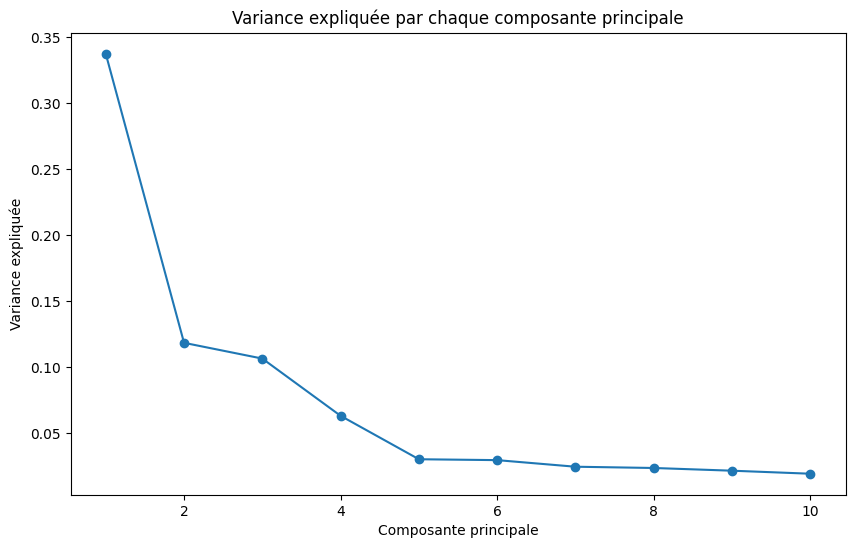

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X_scaled = StandardScaler().fit_transform(X_quanti)  # Normalisation des données

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Visualiser la variance expliquée par chaque composante
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Variance expliquée par chaque composante principale")
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")
plt.show()

In [43]:
from sklearn.feature_selection import f_classif

# Calcul des p-valeurs pour chaque composante par rapport à la cible
p_values = f_classif(X_pca, y)[1]

# Créer un DataFrame pour les p-valeurs
pca_importance = pd.DataFrame({'PC': [f'PC{i+1}' for i in range(len(p_values))], 'p_value': p_values})
pca_importance.sort_values(by='p_value', inplace=True)

# Afficher les composantes principales les plus corrélées avec la cible
print("Composantes principales les plus associées à la cible :")
print(pca_importance.head(10))

Composantes principales les plus associées à la cible :
     PC  p_value
0   PC1      0.0
1   PC2      0.0
2   PC3      0.0
3   PC4      0.0
4   PC5      0.0
5   PC6      0.0
6   PC7      0.0
7   PC8      0.0
8   PC9      0.0
9  PC10      0.0


Charges des variables pour chaque composante principale :
                                         PC1       PC2       PC3       PC4  \
Conso_chauffage_dépensier_é_finale  0.187864 -0.025523 -0.026060  0.154934   
Emission_GES_ECS                    0.166742 -0.008739 -0.010453 -0.131089   
Emission_GES_chauffage              0.172099 -0.026730 -0.018066  0.136276   
Coût_ECS_énergie_n°1                0.158452  0.001828 -0.027795 -0.200120   
Conso_ECS_é_finale                  0.183705 -0.006962 -0.016644 -0.165220   
...                                      ...       ...       ...       ...   
Besoin_chauffage                    0.051041 -0.063734  0.339429  0.024269   
Deperditions_enveloppe              0.046263 -0.064112  0.353060 -0.004469   
Année_construction                 -0.023940  0.018578 -0.024993 -0.172986   
Besoin_ECS                          0.029777 -0.056102  0.325576 -0.057013   
Besoin_refroidissement              0.002842  0.127534  0.020955  0.025434   

     

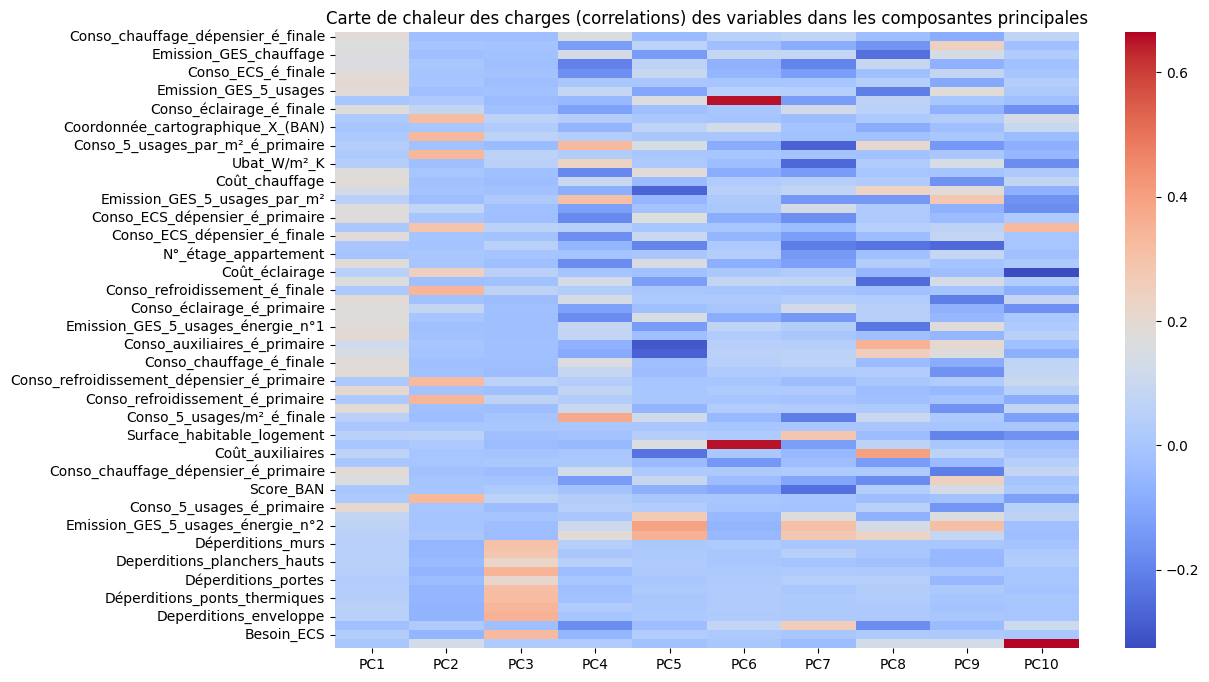

In [44]:
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(pca.components_))], index=X_quanti.columns)

# Afficher les charges (coefficients) de chaque variable par rapport aux composantes
print("Charges des variables pour chaque composante principale :")
print(loadings)

# 5. Identifier les variables corrélées : Visualiser les charges avec une carte de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap="coolwarm")
plt.title("Carte de chaleur des charges (correlations) des variables dans les composantes principales")
plt.show()

In [45]:
# Calculer la contribution globale de chaque variable en sommant les charges absolues
importance_scores = loadings.abs().sum(axis=1)

# Trier les variables par leur importance et sélectionner les plus importantes
variables_importantes = importance_scores.sort_values(ascending=False)
print("Variables les plus importantes :")
print(variables_importantes[variables_importantes > 0.5] )

Variables les plus importantes :
Emission_GES_5_usages_énergie_n°2         1.431527
Conso_5_usages_par_m²_é_primaire          1.362142
Coût_chauffage_énergie_n°2                1.293198
Emission_GES_5_usages_par_m²              1.200274
Conso_auxiliaires_é_primaire              1.175102
                                            ...   
Emission_GES_refroidissement_dépensier    0.513637
Deperditions_planchers_bas                0.513459
Conso_5_usages_é_finale_énergie_n°1       0.511985
Déperditions_ponts_thermiques             0.510779
Coordonnée_cartographique_X_(BAN)         0.502179
Length: 60, dtype: float64


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=0, verbose=1)
rf.fit(X_quanti, y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.9min


RandomForestClassifier(min_samples_split=5, random_state=0, verbose=1)

In [47]:
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Variable': X_quanti.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

selected_importance_df = importance_df[importance_df['Importance'] > 0.015]
# Afficher les proportions de participation des variables
print("Proportion de participation des variables :")
print(selected_importance_df)
final_var_quanti = selected_importance_df.Variable.to_list()

Proportion de participation des variables :
                            Variable  Importance
12  Conso_5_usages_par_m²_é_primaire    0.251828
18      Emission_GES_5_usages_par_m²    0.169790
42        Conso_5_usages/m²_é_finale    0.124070
26                    Coût_éclairage    0.022935
52         Conso_5_usages_é_primaire    0.022497
29        Conso_chauffage_é_primaire    0.022237
6              Emission_GES_5_usages    0.020563
44        Surface_habitable_logement    0.020150
30        Conso_éclairage_é_primaire    0.016028
66                        Besoin_ECS    0.015654
8           Conso_éclairage_é_finale    0.015275
16                    Coût_chauffage    0.015161
2             Emission_GES_chauffage    0.015058
37          Coût_chauffage_dépensier    0.015005


In [48]:
len(final_var_quanti)

14

In [49]:
select_var_quali = ["Nom__commune_(BAN)", "Date_réception_DPE", "Date_fin_validité_DPE", "_geopoint", "Date_visite_diagnostiqueur", "Date_établissement_DPE", "Code_INSEE_(BAN)", "Statut_géocodage", "Adresse_brute", "Etiquette_DPE"]
X_quali = qualitative_data[qualitative_data.columns.difference(select_var_quali)]
X_quali.shape

(457318, 18)

In [50]:
X_quali.columns

Index(['Classe_altitude', 'Classe_inertie_bâtiment', 'Etiquette_GES',
       'Indicateur_confort_été', 'Logement', 'Modèle_DPE',
       'Méthode_application_DPE', 'Qualité_isolation_enveloppe',
       'Qualité_isolation_menuiseries', 'Qualité_isolation_murs',
       'Qualité_isolation_plancher_bas', 'Type_bâtiment',
       'Type_installation_ECS_(général)', 'Type_installation_chauffage',
       'Type_énergie_n°1', 'Type_énergie_n°2',
       'Type_énergie_principale_chauffage', 'Zone_climatique_'],
      dtype='object')

#### on va devoir subdiviser les données qualité en 2 partie pour trier les plus importantes

In [51]:
X_quali = pd.get_dummies(X_quali, drop_first=True)

In [52]:
rf_quali = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=0, verbose=1)
rf_quali.fit(X_quali, y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   43.4s


RandomForestClassifier(min_samples_split=5, random_state=0, verbose=1)

In [87]:
importances = rf_quali.feature_importances_
importance_df = pd.DataFrame({
    'Variable': X_quali.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
importance_df_select = importance_df[importance_df['Importance'] > 0.014]

# Afficher les proportions de participation des variables
print("Proportion de participation des variables :")
print(importance_df_select)

Proportion de participation des variables :
                                         Variable  Importance
6                                 Etiquette_GES_C    0.145562
5                                 Etiquette_GES_B    0.119349
7                                 Etiquette_GES_D    0.094594
8                                 Etiquette_GES_E    0.062187
9                                 Etiquette_GES_F    0.040486
31            Qualité_isolation_murs_insuffisante    0.037946
52                   Type_énergie_n°1_Gaz naturel    0.031869
25       Qualité_isolation_enveloppe_insuffisante    0.026862
13                                  Logement_neuf    0.024835
33              Qualité_isolation_murs_très bonne    0.024507
55                   Type_énergie_n°1_Électricité    0.024142
69                   Type_énergie_n°2_Électricité    0.023231
65                       Type_énergie_n°2_Inconnu    0.022384
78  Type_énergie_principale_chauffage_Gaz naturel    0.020252
30       Qualité_isolation

In [88]:
from sklearn.feature_selection import chi2, SelectKBest


chi2_selector = SelectKBest(chi2, k=10)
X_qualitative_selected = chi2_selector.fit_transform(X_quali, y)

# Obtenir les noms des variables sélectionnées
selected_features = X_quali.columns[chi2_selector.get_support()]
print("Variables qualitatives sélectionnées :", selected_features.tolist())


Variables qualitatives sélectionnées : ['Etiquette_GES_C', 'Etiquette_GES_D', 'Etiquette_GES_E', 'Etiquette_GES_F', 'Etiquette_GES_G', 'Logement_neuf', 'Modèle_DPE_DPE NEUF logement : RT2012', "Méthode_application_DPE_dpe issu d'une étude thermique réglementaire RT2012 bâtiment : maison individuelle", 'Qualité_isolation_menuiseries_très bonne', 'Qualité_isolation_murs_très bonne']


In [ ]:
final_var_quali = ["Etiquette_GES", "Qualité_isolation_murs", "Type_énergie_n°1", "Qualité_isolation_enveloppe", "Logement", "Type_énergie_n°1", "Type_énergie_n°2", "Type_énergie_principale_chauffage", "Qualité_isolation_menuiseries", "Modèle_DPE", "Type_bâtiment", "Qualité_isolation_plancher_bas"]


In [55]:
# X, y final après sélection de variables pour apprentissage

final_vars = final_var_quali + final_var_quanti

X = df_processed[final_vars]
y = df_processed["Etiquette_DPE"]

In [56]:
len(final_vars)

26

### Apprentissage supervisé

In [57]:
df_processed['Etiquette_DPE'].value_counts(normalize=True)
df_processed['passoire_energetique'] = df_processed['Etiquette_DPE'].isin(['F', 'G'])

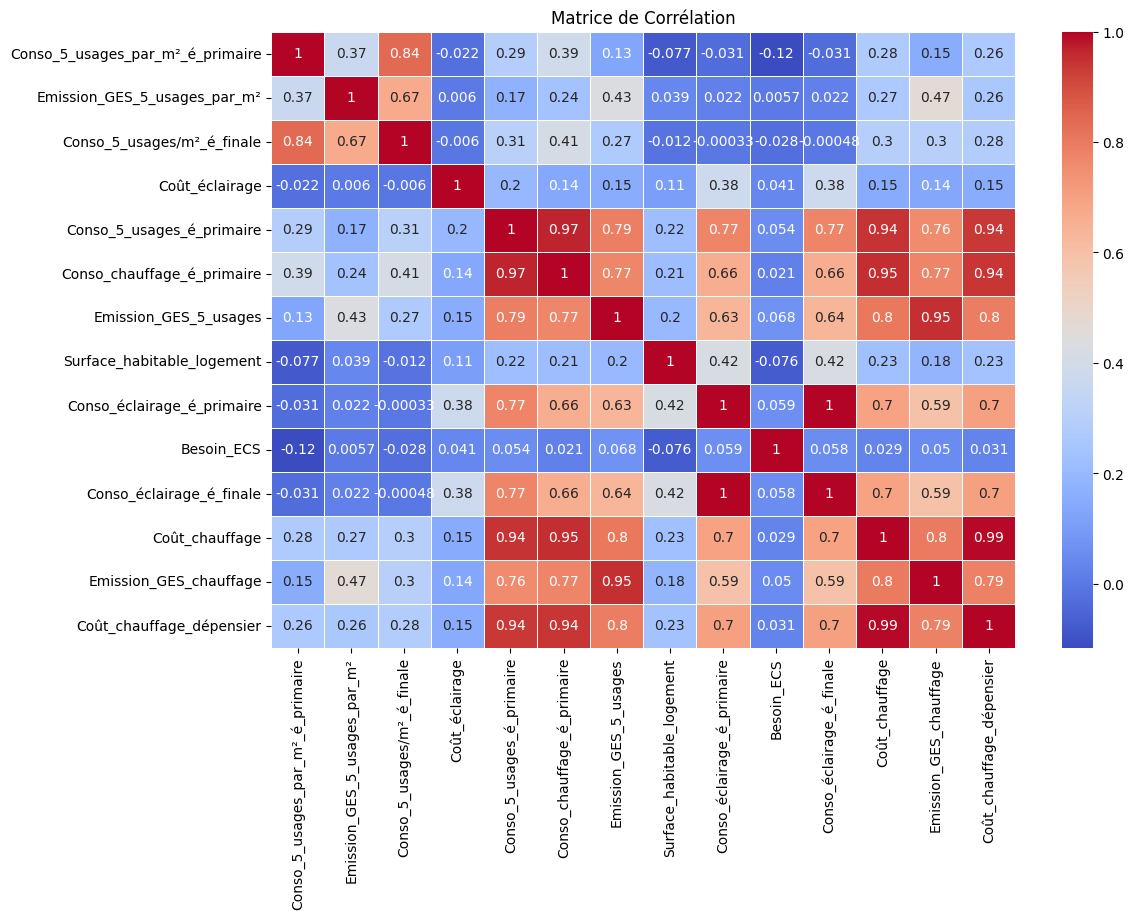

In [58]:
# Corrélation entre les variables 
# Calcul de la matrice de corrélation
corr_matrix = df_processed[final_var_quanti].corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

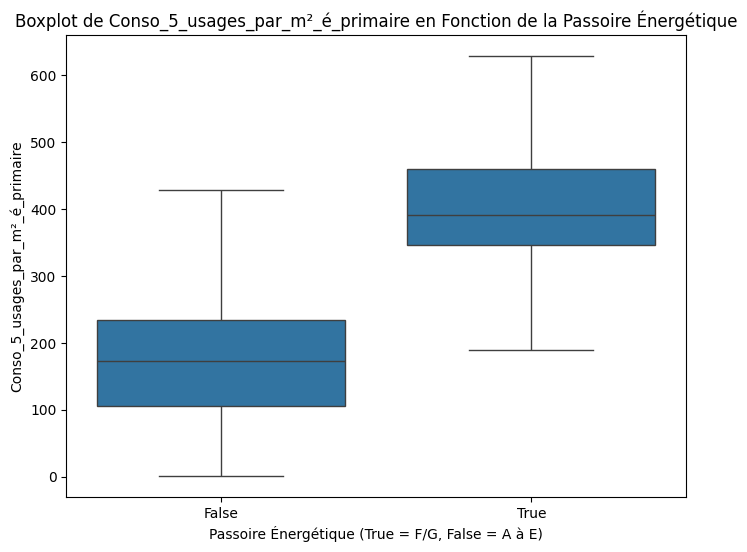

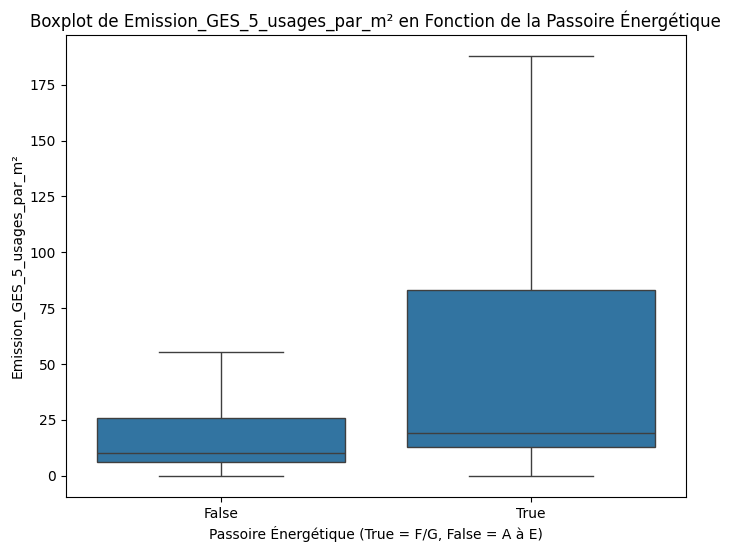

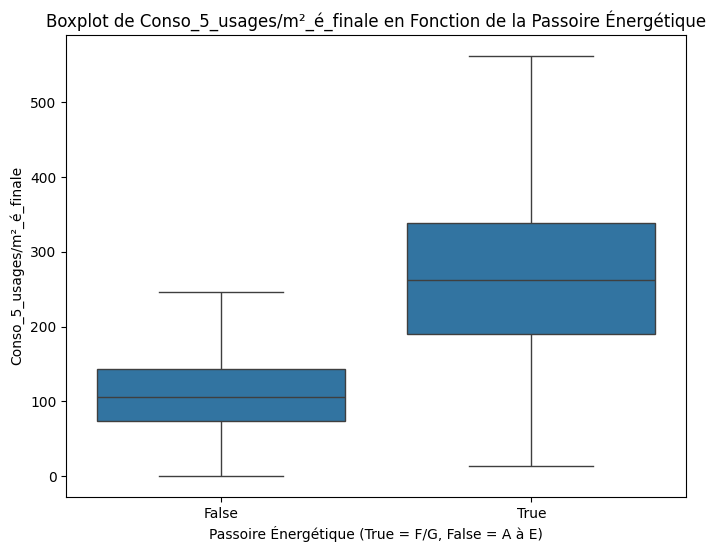

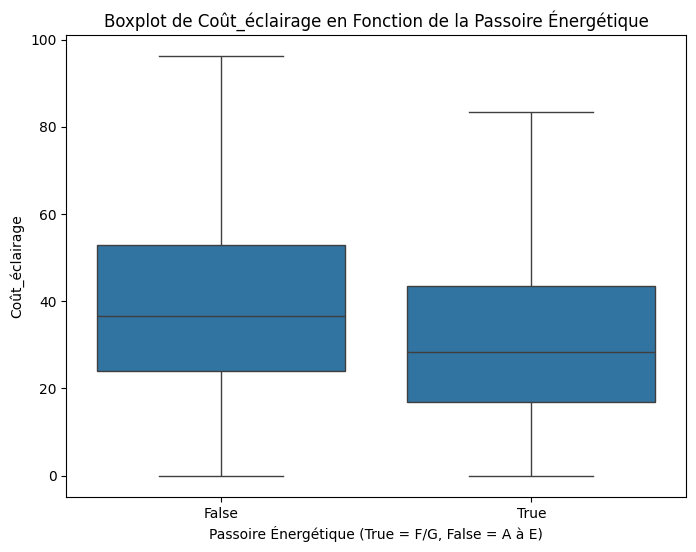

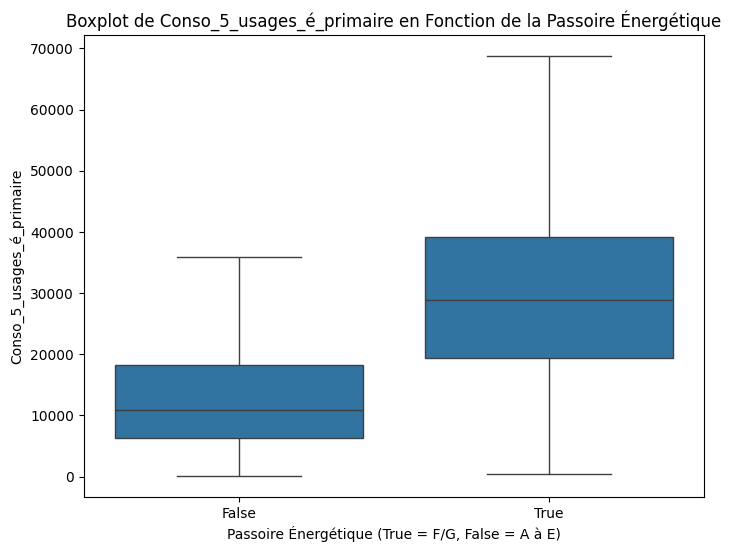

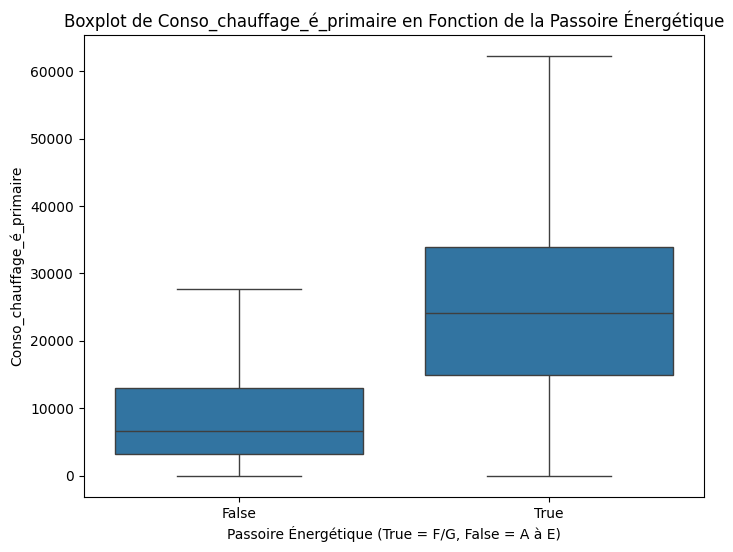

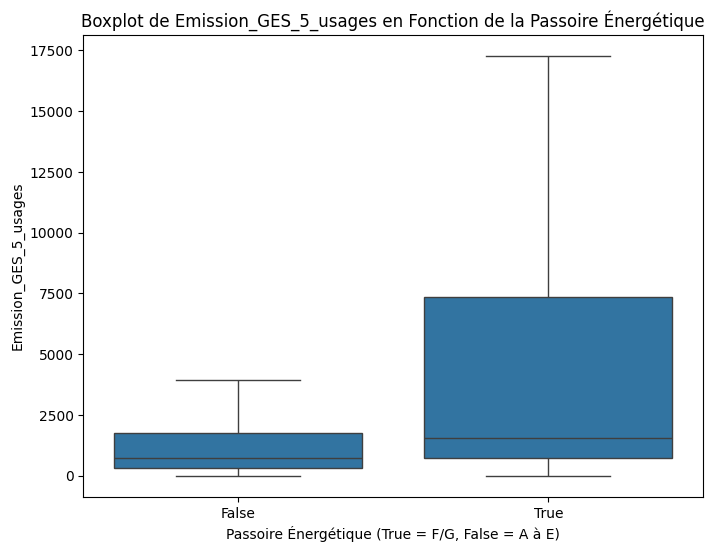

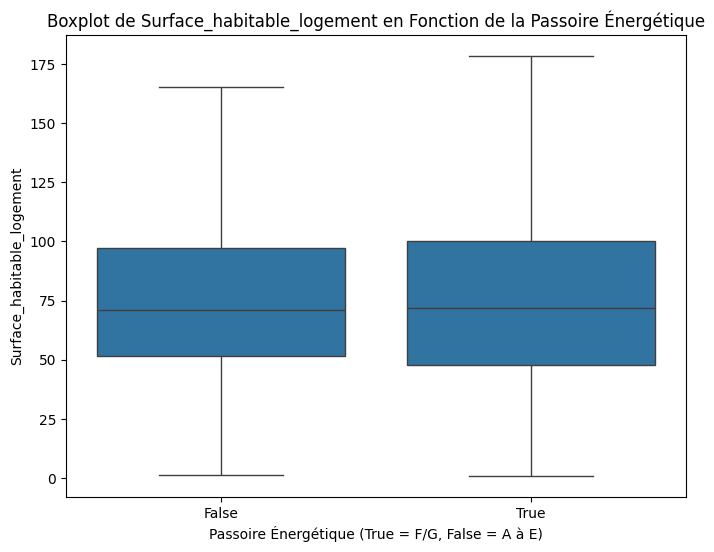

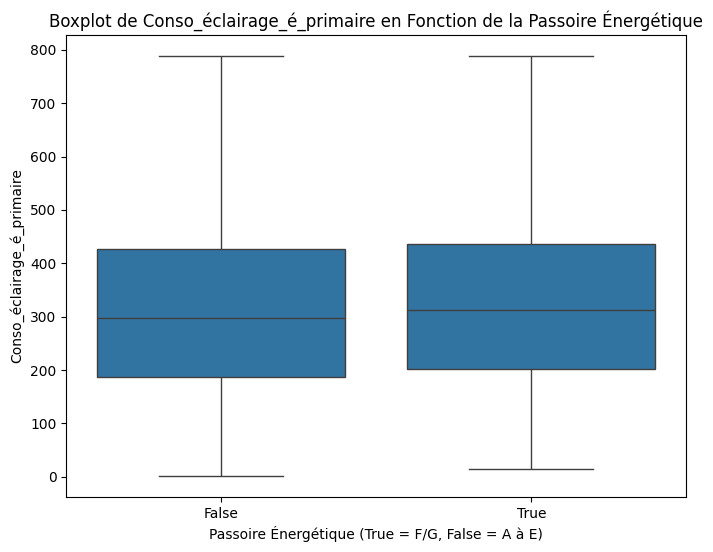

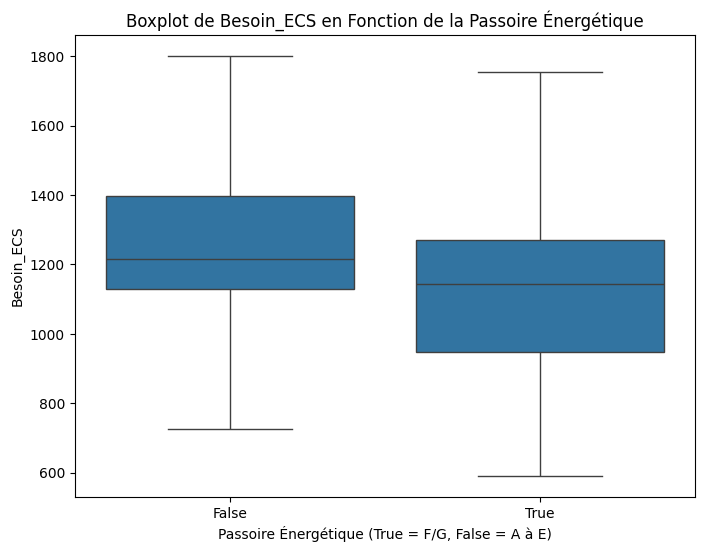

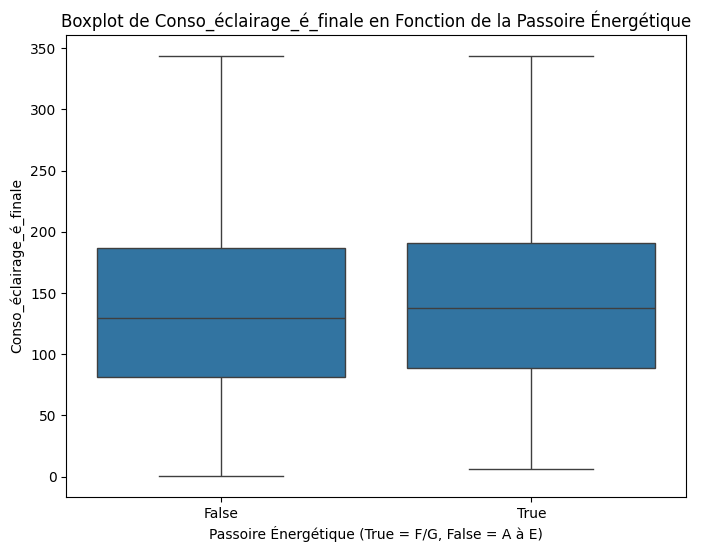

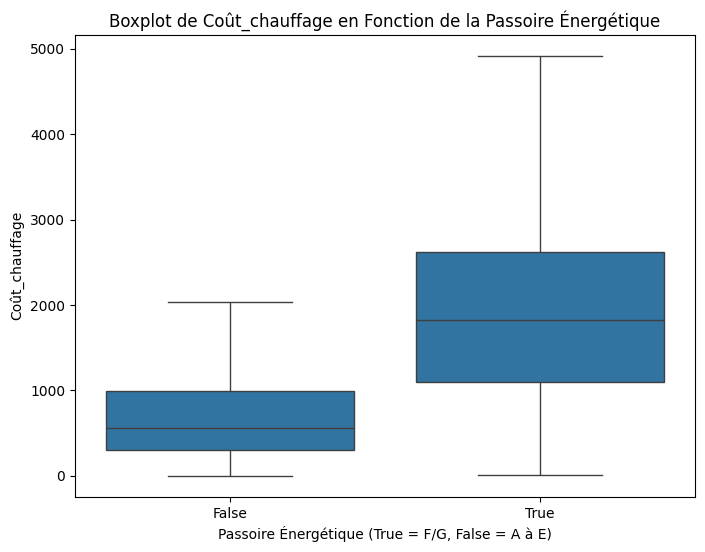

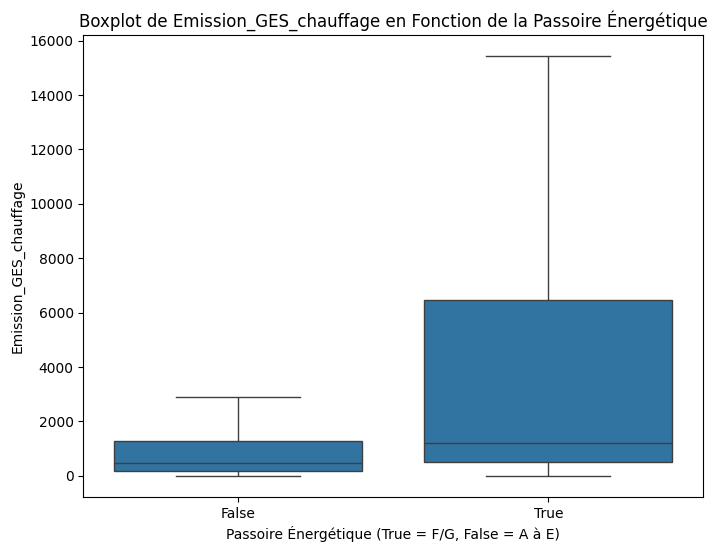

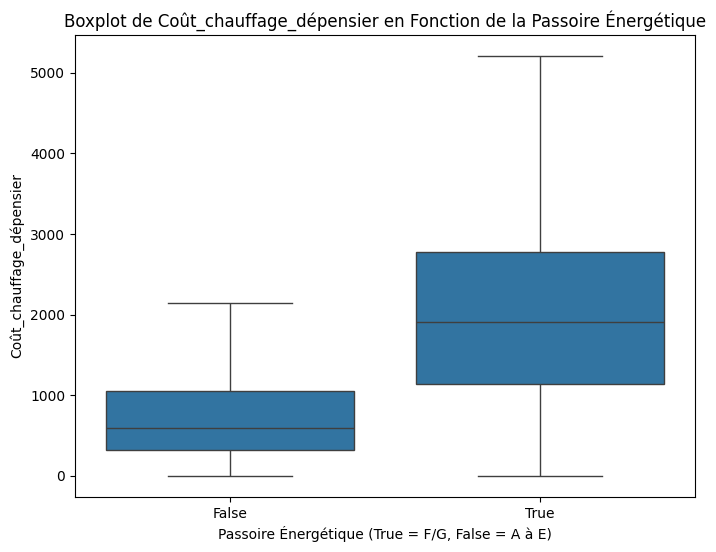

In [60]:
# Boxplot de chaque variable explicative par rapport à la passoire énergétique
for col in final_var_quanti:
    plt.figure(figsize=(8, 6))
    
    # Tracer le boxplot sans les outliers
    sns.boxplot(x='passoire_energetique', y=col, data=df_processed, showfliers=False)
    
    # Automatiser le titre avec le nom de la colonne
    plt.title(f'Boxplot de {col} en Fonction de la Passoire Énergétique')
    
    plt.xlabel('Passoire Énergétique (True = F/G, False = A à E)')
    plt.ylabel(f'{col}')  # Automatiser l'étiquette de l'axe y avec le nom de la colonne
    plt.show()


In [73]:
df_ = pd.get_dummies(df_processed[final_var_quali + final_var_quanti], columns=final_var_quali, drop_first=True)
df_['passoire_energetique'] = df_processed['passoire_energetique']

In [75]:
X =df_[df_.columns.difference(['passoire_energetique'])]
Y = df_['passoire_energetique']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    stratify = Y,
                                                    random_state = 42)

In [77]:
y_train.value_counts(normalize=True)


passoire_energetique
False    0.876116
True     0.123884
Name: proportion, dtype: float64

In [78]:
y_test.value_counts(normalize=True)

passoire_energetique
False    0.876112
True     0.123888
Name: proportion, dtype: float64

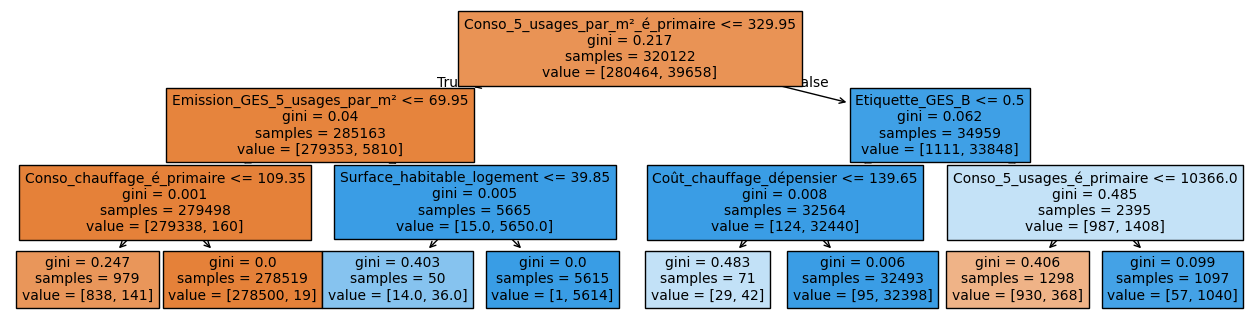

In [79]:
from sklearn.tree import DecisionTreeClassifier
model_arbre = DecisionTreeClassifier(max_depth=3 , min_samples_leaf=50, min_samples_split=100)
model_arbre = model_arbre.fit(X_train,y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(16,4))
plot_tree(model_arbre,feature_names = list(X.columns),filled=True, fontsize=10)
plt.show()

In [80]:
y_pred = model_arbre.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [82]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(accuracy_score(y_test,y_pred))

0.9975873932184611


In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
print('f1_score : ' + str(f1_score(y_test,y_pred_knn,average='binary', pos_label=1)))

f1_score : 0.8203880505081613


In [84]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log_model = reg_log.fit(X_train, y_train)
y_pred_reg = reg_log_model.predict(X_test)

print('f1_score : ' + str(f1_score(y_test,y_pred_reg,average='binary', pos_label=1)))

c:\Users\Evidya\Documents\cours M2\python ML\projet\m2-enedis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1_score : 0.8645494194975122
